# CS760 HW3
# By Luke Neuendorf
***

In [1]:
# public library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings

# setup
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
warnings.filterwarnings('ignore')

# custum implementations
import KNN as knn

***

(-0.03, 1.03)

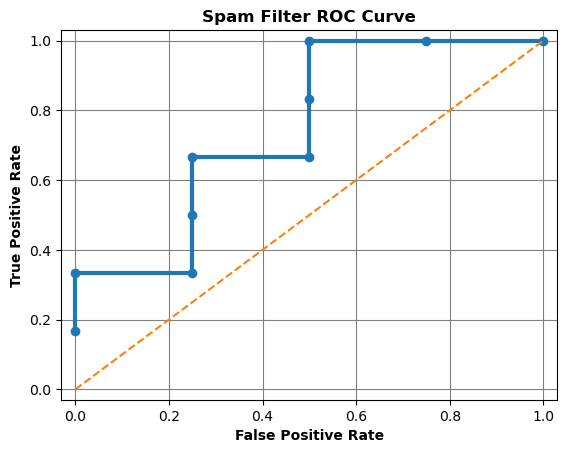

In [3]:
fpr = [0,0,.25,.25,.25,.5,.5,.5,.75,1]
tpr = [1/6,1/3,1/3,.5,2/3,2/3,5/6,1,1,1]
fig, ax =plt.subplots(1)
ax.plot(fpr,tpr,marker='o',lw=3)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10), linestyle='dashed')
ax.set_ylabel('True Positive Rate',weight='bold')
ax.set_xlabel('False Positive Rate',weight='bold')
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray')
ax.yaxis.grid(color='gray')
ax.set_title('Spam Filter ROC Curve',weight='bold')
ax.set_ylim([-.03,1.03])
ax.set_xlim([-.03,1.03])

***
## Problem 1

In [4]:
d2z = pd.read_csv('../data/D2z.txt', sep=' ', names=['X1','X2','Y'])

In [5]:
y_d2z = d2z.iloc[:,-1:]
x1_d2z = d2z.iloc[:,0:1]
x2_d2z = d2z.iloc[:,1:2]
x_d2z = d2z.iloc[:,0:2]

In [6]:
model = knn.KNNClassifier(x_d2z,y_d2z)

In [7]:
x = np.arange(start=-2,stop=2.1,step=.1)
x1, x2 = np.meshgrid(x, x)
y = np.zeros([41,41])
for i in range(0,len(x1)):
    y[i] = model.predict(pd.DataFrame([x1[0],x2[i]]).T,k=1).flatten()
    
df = pd.DataFrame((x1.flatten(),x2.flatten(),y.flatten())).T
df.columns = ['x1','x2','y']

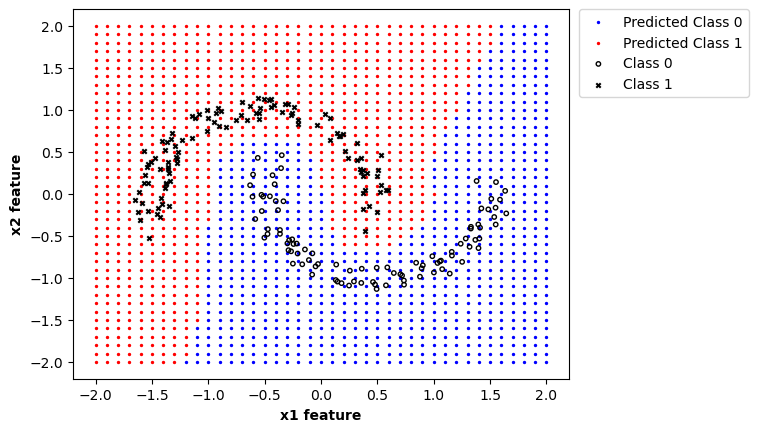

In [11]:
plt.scatter(df[df.y==0].x1,df[df.y==0].x2, marker='o', color='b', s=2,label='Predicted Class 0')
plt.scatter(df[df.y==1].x1,df[df.y==1].x2, marker='o', color='r', s=2,label='Predicted Class 1')
plt.scatter(d2z[d2z.Y==0].X1,d2z[d2z.Y==0].X2,facecolors='none', edgecolors='black',label='Class 0',s=10)
plt.scatter(d2z[d2z.Y==1].X1,d2z[d2z.Y==1].X2,marker='x',color='black',label='Class 1',s=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('x1 feature',weight='bold')
plt.ylabel('x2 feature',weight='bold')
plt.savefig('q1.png', bbox_inches='tight')

***
# Problem 2

In [18]:
emails = pd.read_csv('../data/emails.csv')

In [19]:
def knn_cross_validation(df, folds, k, print_bool):
    len_split = int(len(df) / folds)
    splits = []
    index = 0
    for i in range(0,folds):
        splits.append(df.iloc[index:(index+len_split),:].reset_index(drop=True))
        index += len_split
    accuracies = []
    for i in range(0,folds):
        df_train = pd.DataFrame(columns=emails.columns)
        for j in range(0,folds):
            if j != i:
                df_train = pd.concat([df_train,splits[j]],ignore_index = True)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(df_train.iloc[:,1:-1],df_train.iloc[:,-1:].values.ravel().astype('int'))
        y_pred = model.predict(splits[i].iloc[:,1:-1])
        y_test = splits[i].iloc[:,-1:]
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        if print_bool:
            print("Fold", (i+1))
            print("\tAccuracy:", accuracy)
            print("\tPrecision: %.4f"% precision)
            print("\tRecall: %.4f"% recall)
    return accuracies

In [20]:
knn_cross_validation(df=emails, folds=5,k=1, print_bool=True);

Fold 1
	Accuracy: 0.825
	Precision: 0.6545
	Recall: 0.8175
Fold 2
	Accuracy: 0.853
	Precision: 0.6857
	Recall: 0.8664
Fold 3
	Accuracy: 0.862
	Precision: 0.7212
	Recall: 0.8380
Fold 4
	Accuracy: 0.851
	Precision: 0.7164
	Recall: 0.8163
Fold 5
	Accuracy: 0.775
	Precision: 0.6057
	Recall: 0.7582


***
# Problem 3

The solution to this problem can be found in the notebook in the LogisticRegression folder.

***
# Problem 4

In [21]:
k_vals = [1,3,5,7,10]
avg_accs = []
for k in k_vals:
    accuracies = knn_cross_validation(df=emails, folds=5,k=k, print_bool=False)
    avg_acc = sum(accuracies) / len(accuracies)
    avg_accs.append(avg_acc)

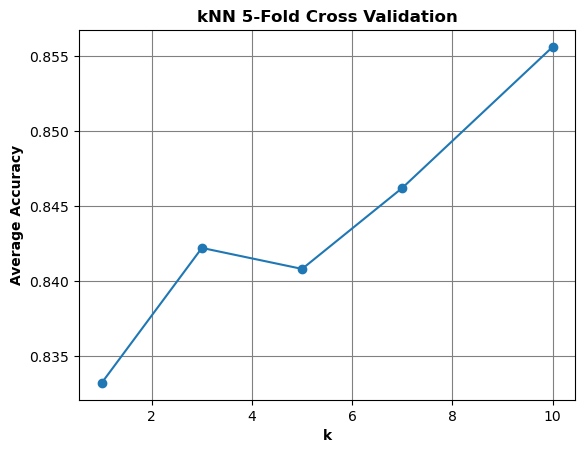

In [25]:
fig, ax =plt.subplots(1)
ax.plot(k_vals,avg_accs,marker='o') 
ax.set_ylabel('Average Accuracy',weight='bold')
ax.set_xlabel('k',weight='bold')
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray')
ax.yaxis.grid(color='gray')
ax.set_title('kNN 5-Fold Cross Validation',weight='bold')
fig.savefig('q4.png', bbox_inches='tight')


***
# Problem 5

In [35]:
X_train,X_test,y_train,y_test = emails.iloc[:4000,1:-1],emails.iloc[4000:,1:-1],emails.iloc[:4000,-1:],emails.iloc[4000:,-1:]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())
y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, thresholds_knn= metrics.roc_curve(y_test,  y_pred_proba_knn)

In [36]:
print("KNN AUC:",metrics.roc_auc_score(y_test, y_pred_proba_knn))

KNN AUC: 0.846393456518054


In [37]:

model = LogisticRegression().fit(X_train, y_train.values.ravel())
y_pred_proba_lr = model.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test,  y_pred_proba_lr)

In [38]:
print("KNN AUC:",metrics.roc_auc_score(y_test, y_pred_proba_lr))

KNN AUC: 0.9739880582396264


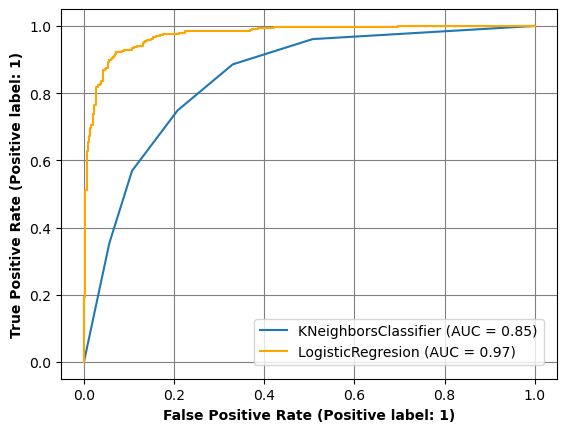

In [40]:
fig, ax =plt.subplots(1)
ax.plot(fpr_knn,tpr_knn,label='KNeighborsClassifier (AUC = 0.85)')
ax.plot(fpr_lr,tpr_lr,label='LogisticRegresion (AUC = 0.97)',color='orange')
ax.set_ylabel('True Positive Rate (Positive label: 1)',weight='bold')
ax.set_xlabel('False Positive Rate (Positive label: 1)',weight='bold')
ax.legend(loc='lower right', borderaxespad=1)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray')
ax.yaxis.grid(color='gray')
fig.savefig('q5.png', bbox_inches='tight')